# Visual Cooccurrence Probability Soft Relabeling as gallery (?)

In [1]:
from dlcliche.notebook import *
from dlcliche.image import *
from lib_fat2019 import *
from domain_freq_xfer import *

plt_looks_good()

# Folders
conf.DATA = Path('/mnt/dataset/freesound-audio-tagging-2019')
conf.ROOT = Path('/mnt/dataset/fat2019_files')
conf.WORK = Path('/mnt/dataset/work/fat2019')
update_conf(conf)

In [8]:
df = pd.read_csv(conf.CSV_TRN_CURATED)
classes = get_classes(conf)

add_one_hot(df, classes).head()

,fname,labels,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),...,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,0006ae4e.wav,Bark,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0019ef41.wav,Raindrop,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,001ec0ad.wav,Finger_snapping,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0026c7cb.wav,Run,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0026f116.wav,Finger_snapping,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizing _hard labels_

Training set has multi labels assigning to each samples. Let's see as image.

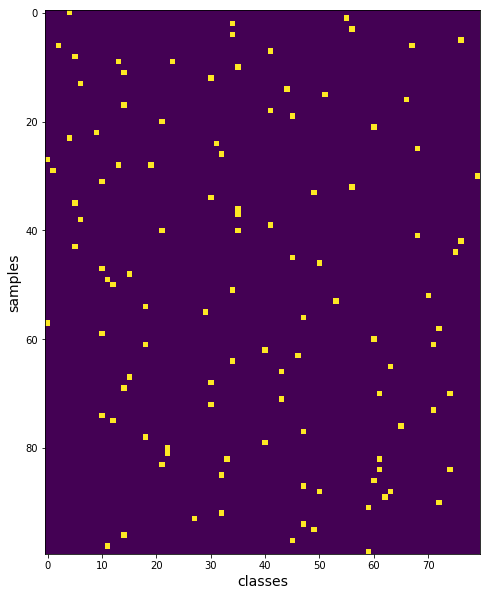

In [10]:
def plot_labels_as_image(df, classes, rows=100):
    plt.imshow(df[classes].values[:rows])
    plt.ylabel('samples')
    plt.xlabel('classes')

plot_labels_as_image(df, classes)

## Converting to _Soft labels_

Soft labels are calculated as mean of probability of _cooccurrence_ of labels. Probability is calculated by frequency of cooccurence.

Example) If a class `Sink_(filling_or_washing)` has 100 samples, and `Water_tap_and_faucet` comes with it for 50 samples, then coocurrence of `Water_tap_and_faucet` to `Sink_(filling_or_washing)` is calculated as `0.5 = 50/100`.

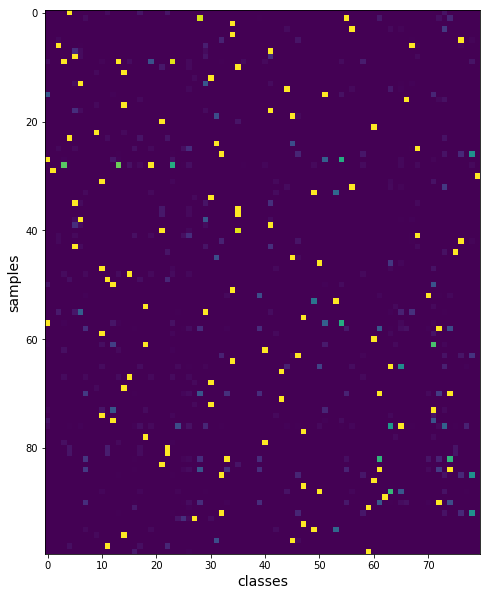

In [13]:
coocfy_one_hots(df, classes, prior_df=df, T=1)
plot_labels_as_image(df, classes)